In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             f1_score,
                             recall_score,
                             precision_score,
                             mean_absolute_error,
                             mean_squared_error,
                             root_mean_squared_error,
                             r2_score)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [ ]:
#ZAD 1
movies = pd.read_csv('movies.csv')

In [ ]:
#Wybranie interesujacych nas kolumn
dane_movies = movies[['budget', 'revenue']]
dane_movies.head()
#Znormalizowanie danych by byly latwiejsze do zrozumienia
dane_movies_norm = dane_movies.copy()
dane_movies_norm['budget'] = dane_movies['budget'] / 1000000
dane_movies_norm['revenue'] = dane_movies['revenue'] / 1000000
dane_movies_norm.head()

,budget,revenue
0,237.0,2787.965087
1,300.0,961.000000
2,245.0,880.674609
3,250.0,1084.939099
4,260.0,284.139100


In [ ]:
#Sprawdzenie informacji i usunicie pustych wartosci
dane_movies_norm.info()
dane_movies_norm.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   budget   4803 non-null   float64
 1   revenue  4803 non-null   float64
dtypes: float64(2)
memory usage: 75.2 KB


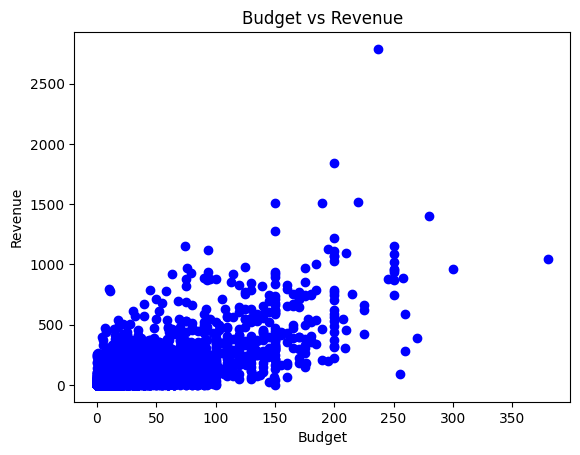

In [ ]:
#Przedstawienie analizowanych danych na wykresie punktowym
plt.scatter(dane_movies_norm['budget'], dane_movies_norm['revenue'], color='blue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs Revenue')
plt.show()

In [ ]:
#Podzial na zbior testowy i treningowy
X_train, X_test, y_train, y_test = train_test_split(dane_movies_norm.drop('revenue', axis=1), dane_movies_norm['revenue'], test_size=0.2, random_state=42)

In [ ]:
#Trenowanie modelu
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Wyznaczanie wspolczynnikow
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)

Coefficients:  [2.92557264]
Intercept:  -1.6944401683260963


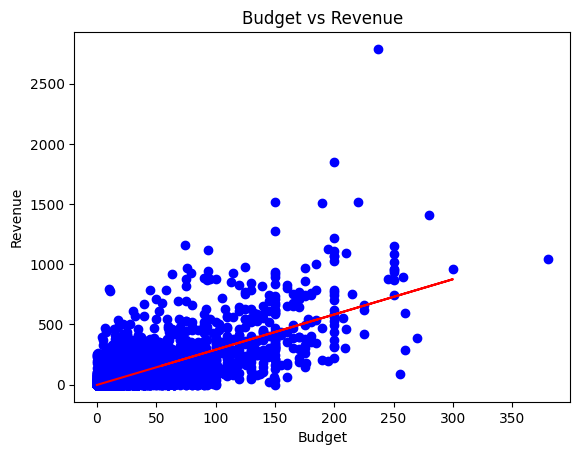

In [ ]:
#Narysowanie linii regresji
plt.scatter(dane_movies_norm['budget'], dane_movies_norm['revenue'], color='blue')
plt.plot(X_train, model.coef_*X_train + model.intercept_, color='red')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs Revenue')
plt.show()

In [ ]:
#Wyznaczanie odpowiednich metryk
y_test_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Absolute Error: 53.95098458986874
Mean Squared Error: 9435.613156761829
Root Mean Squared Error: 97.13708435382354
R-squared: 0.6377336187011596


In [ ]:
#ZAD 2
breasts = pd.read_csv('breast-cancer.csv')
breasts.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Usunięcie pustych i niepotrzebnych wartości
breasts = breasts.dropna()
breasts = breasts.drop('id', axis=1)
breasts.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Zamiana diagnosis z liter na cyfry
le = LabelEncoder()
breasts['diagnosis'] = le.fit_transform(breasts['diagnosis'])
breasts.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Zmienna zalezna i zmienne niezalezne
X = breasts.drop(['diagnosis'], axis=1)
Y = breasts['diagnosis']

In [ ]:
#Dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(455, 455, 114, 114)

In [ ]:
#Stworzenie i Trenowanie modeli
LR = LogisticRegression(solver='lbfgs', max_iter=1000)
KNN = KNeighborsClassifier()
NB = GaussianNB()
LSVM = LinearSVC(dual=False, max_iter=10000)
NLSVM = SVC(kernel='rbf')
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()

In [ ]:
LR_fit = LR.fit(X_train, y_train)
KNN_fit = KNN.fit(X_train, y_train)
NB_fit = NB.fit(X_train, y_train)
LSVM_fit = LSVM.fit(X_train, y_train)
NLSVM_fit = NLSVM.fit(X_train, y_train)
DT_fit = DT.fit(X_train, y_train)
RF_fit = RF.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
LR_pred = LR_fit.predict(X_test)
KNN_pred = KNN_fit.predict(X_test)
NB_pred = NB_fit.predict(X_test)
LSVM_pred = LSVM_fit.predict(X_test)
NLSVM_pred = NLSVM_fit.predict(X_test)
DT_pred = DT_fit.predict(X_test)
RF_pred = RF_fit.predict(X_test)

In [ ]:
#Ewaluacja wynikow
accuracy = accuracy_score(LR_pred, y_test)
f1 = f1_score(LR_pred, y_test, average='weighted')
recall = recall_score(LR_pred, y_test)
precision = precision_score(LR_pred, y_test)

print('Accuracy:', accuracy)
print('F1 Score:', f1)
print('Recall:', recall)
print('Precision:', precision)

report = classification_report(y_test, LR_pred)
print(report)

Accuracy: 0.956140350877193
F1 Score: 0.9564792746302816
Recall: 0.975
Precision: 0.9069767441860465
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



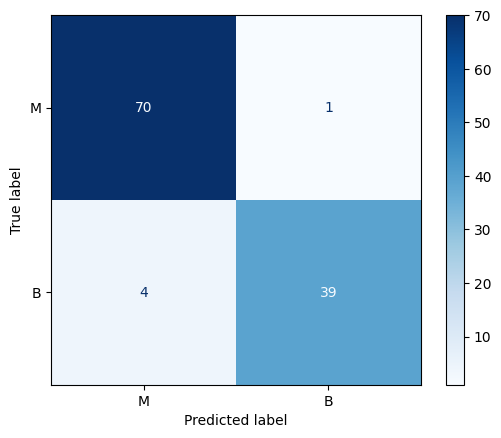

In [ ]:
labels = [0, 1]
cm = confusion_matrix(y_test, LR_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['M', 'B'])
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [ ]:
#Zad 3
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X1 = iris.iloc[:, [3, 4]].values
X2 = iris.iloc[:, [1, 3]].values
X3 = iris.iloc[:, [2, 4]].values

In [ ]:
wcss1 = []
wcss2 = []
wcss3 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=20, random_state=0)
    kmeans.fit(X1)
    wcss1.append(kmeans.inertia_)
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=20, random_state=0)
    kmeans.fit(X2)
    wcss2.append(kmeans.inertia_)
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=20, random_state=0)
    kmeans.fit(X3)
    wcss3.append(kmeans.inertia_)

Text(0.5, 1.0, 'X3')

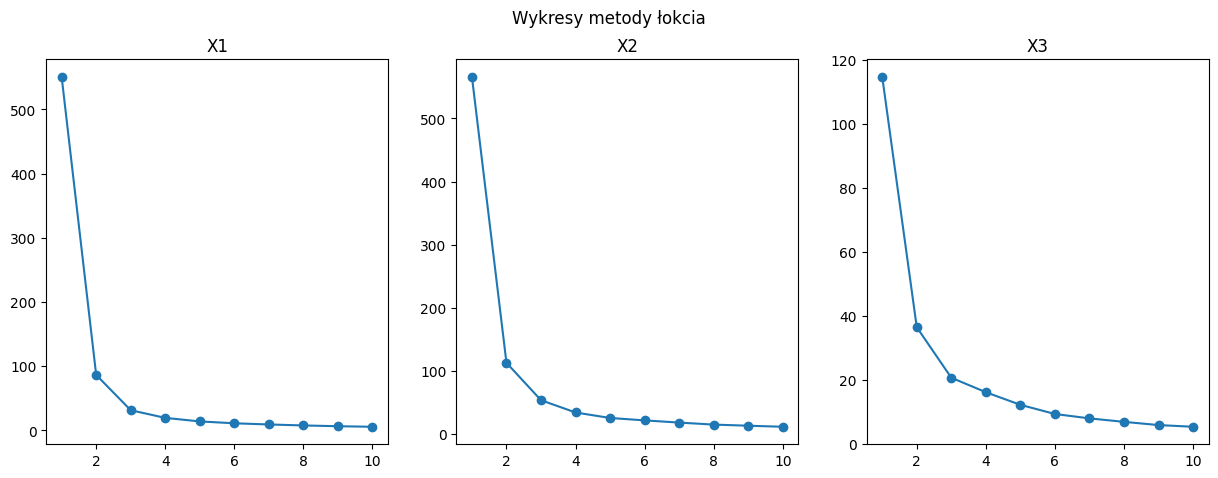

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Wykresy metody łokcia')
ax1.plot(range(1, 11), wcss1, marker="o")
ax1.set_title('X1')
ax2.plot(range(1, 11), wcss2, marker="o")
ax2.set_title('X2')
ax3.plot(range(1, 11), wcss3, marker="o")
ax3.set_title('X3')
#plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_pred1 = kmeans.fit_predict(X1)
kmeans2 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_pred2 = kmeans2.fit_predict(X2)
kmeans3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_pred3 = kmeans3.fit_predict(X3)

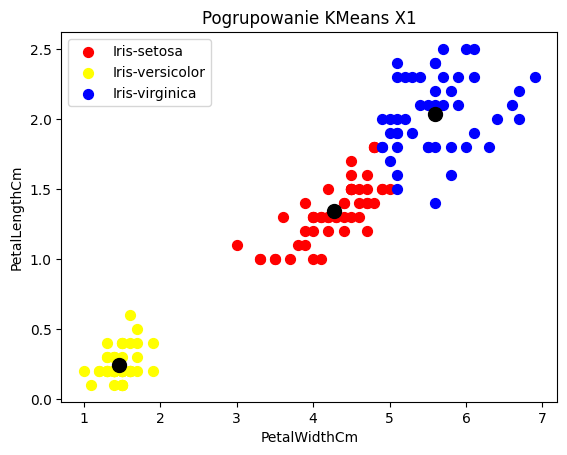

In [ ]:
plt.scatter(X1[y_pred1 == 0, 0], X1[y_pred1 == 0, 1], s=50, c='red', label='Iris-setosa')
plt.scatter(X1[y_pred1 == 1, 0], X1[y_pred1 == 1, 1], s=50, c='yellow', label='Iris-versicolor')
plt.scatter(X1[y_pred1 == 2, 0], X1[y_pred1 == 2, 1], s=50, c='blue', label='Iris-virginica')
plt.ylabel("PetalLengthCm")
plt.xlabel("PetalWidthCm")
plt.title("Pogrupowanie KMeans X1")
plt.legend()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black')
plt.show()

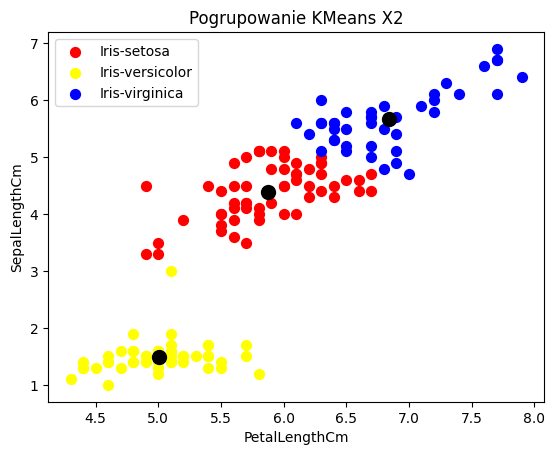

In [ ]:
plt.scatter(X2[y_pred2 == 0, 0], X2[y_pred2 == 0, 1], s=50, c='red', label='Iris-setosa')
plt.scatter(X2[y_pred2 == 1, 0], X2[y_pred2 == 1, 1], s=50, c='yellow', label='Iris-versicolor')
plt.scatter(X2[y_pred2 == 2, 0], X2[y_pred2 == 2, 1], s=50, c='blue', label='Iris-virginica')
plt.ylabel("SepalLengthCm")
plt.xlabel("PetalLengthCm")
plt.title("Pogrupowanie KMeans X2")
plt.legend()
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=100, c='black')
plt.show()

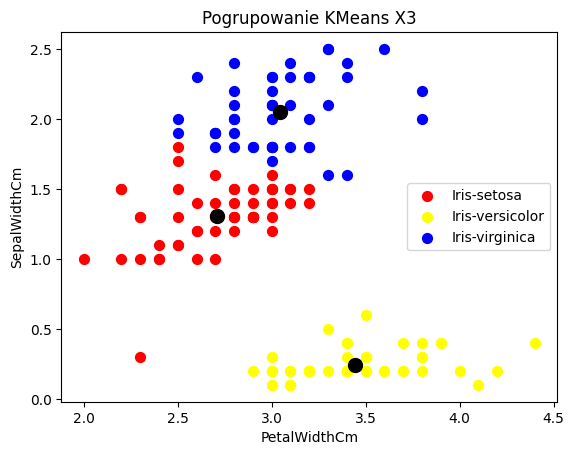

In [ ]:
plt.scatter(X3[y_pred3 == 0, 0], X3[y_pred3 == 0, 1], s=50, c='red', label='Iris-setosa')
plt.scatter(X3[y_pred3 == 1, 0], X3[y_pred3 == 1, 1], s=50, c='yellow', label='Iris-versicolor')
plt.scatter(X3[y_pred3 == 2, 0], X3[y_pred3 == 2, 1], s=50, c='blue', label='Iris-virginica')
plt.ylabel("SepalWidthCm")
plt.xlabel("PetalWidthCm")
plt.title("Pogrupowanie KMeans X3")
plt.legend()
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=100, c='black')
plt.show()

In [ ]:
#Zad 4
mall = pd.read_csv('Mall_Customers.csv')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
mall.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
dane = mall.iloc[:, [2, 4]].values

In [ ]:
wcss_mall = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=20, random_state=0)
    kmeans.fit(dane)
    wcss_mall.append(kmeans.inertia_)

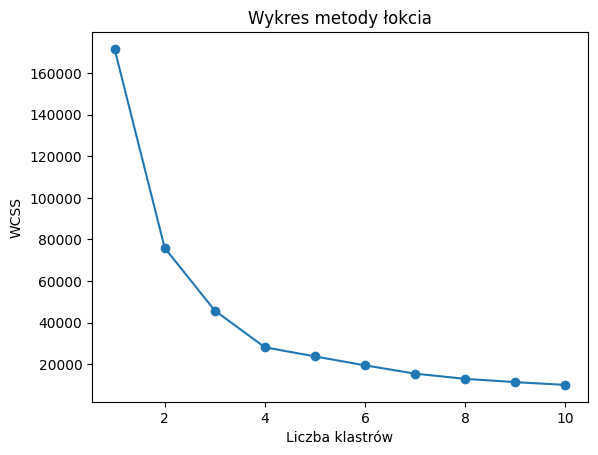

In [ ]:
plt.plot(range(1, 11), wcss_mall, marker="o")
plt.title('Wykres metody łokcia')
plt.xlabel('Liczba klastrów')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_pred = kmeans.fit_predict(dane)

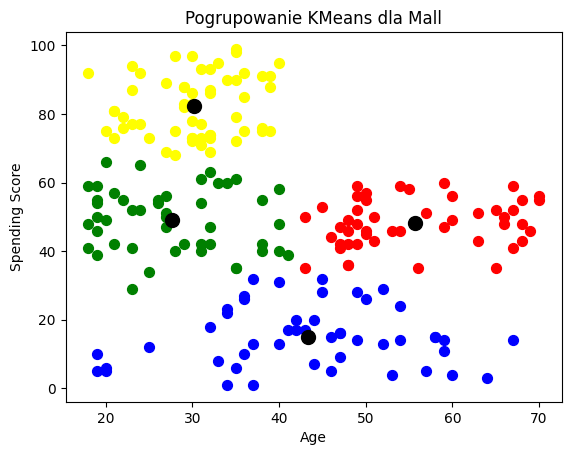

In [ ]:
plt.scatter(dane[y_pred == 0, 0], dane[y_pred == 0, 1], s=50, c='red')
plt.scatter(dane[y_pred == 1, 0], dane[y_pred == 1, 1], s=50, c='yellow')
plt.scatter(dane[y_pred == 2, 0], dane[y_pred == 2, 1], s=50, c='blue')
plt.scatter(dane[y_pred == 3, 0], dane[y_pred == 3, 1], s=50, c='green')
plt.ylabel("Spending Score")
plt.xlabel("Age")
plt.title("Pogrupowanie KMeans dla Mall")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black')
plt.show()